In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [8]:
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,TSLA_open,TSLA_high,...,JNJ_low,JNJ_close,REGN_open,REGN_high,REGN_low,REGN_close,GILD_open,GILD_high,GILD_low,GILD_close
2010-06-29,24.13,24.20,23.110,23.31,264.1205,264.39,254.30,256.17,19.00,25.0000,...,58.680,59.24,23.67,23.95,22.86,22.98,35.40,35.61,34.740,34.97
2010-06-30,23.30,23.68,22.950,23.01,256.7100,257.97,250.01,251.53,25.79,30.4192,...,58.940,59.06,23.05,23.47,22.32,22.32,34.83,35.13,34.260,34.28
2010-07-01,23.09,23.32,22.730,23.16,254.3000,254.80,243.22,248.48,25.00,25.9200,...,58.650,59.07,22.31,22.37,20.45,20.79,34.24,34.27,33.300,34.14
2010-07-02,23.36,23.48,23.050,23.27,250.4900,250.93,243.20,246.94,23.00,23.1000,...,58.850,59.08,21.06,21.88,20.75,21.61,34.38,35.16,34.180,34.87
2010-07-06,23.70,24.09,23.584,23.82,251.0000,252.80,246.16,248.63,20.00,20.0000,...,58.669,59.08,22.03,22.03,21.16,21.36,35.11,35.42,34.415,34.77


In [9]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AAPL_open',
    'AAPL_high',
    'AAPL_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

,MSFT_close,AAPL_close,TSLA_close,JNJ_close,REGN_close,GILD_close
2010-06-29,23.31,256.17,23.89,59.24,22.98,34.97
2010-06-30,23.01,251.53,23.83,59.06,22.32,34.28
2010-07-01,23.16,248.48,21.96,59.07,20.79,34.14
2010-07-02,23.27,246.94,19.20,59.08,21.61,34.87
2010-07-06,23.82,248.63,16.11,59.08,21.36,34.77


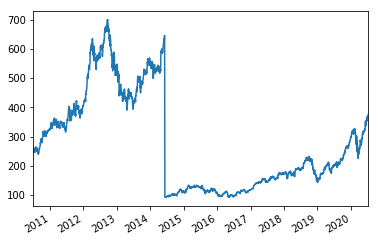

In [13]:
df['AAPL_close'].plot()

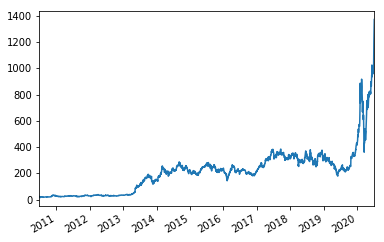

In [11]:
df['TSLA_close'].plot()

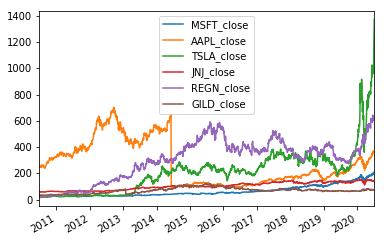

In [12]:
df.plot()

In [21]:
df['MSFT_return'] = df['MSFT_close'].pct_change() * 100
df['MSFT_lagged_return'] = df['MSFT_return'].shift()
df['AAPL_return'] = df['AAPL_close'].pct_change() * 100
df['AAPL_lagged_return'] = df['AAPL_return'].shift()
df['TSLA_return'] = df['TSLA_close'].pct_change() * 100
df['TSLA_lagged_return'] = df['TSLA_return'].shift()
df['JNJ_return'] = df['JNJ_close'].pct_change() * 100
df['JNJ_lagged_return'] = df['JNJ_return'].shift()
df['REGN_return'] = df['REGN_close'].pct_change() * 100
df['REGN_lagged_return'] = df['REGN_return'].shift()
df['GILD_return'] = df['GILD_close'].pct_change() * 100
df['GILD_lagged_return'] = df['GILD_return'].shift()

In [22]:
df.tail()

,MSFT_close,AAPL_close,TSLA_close,JNJ_close,REGN_close,GILD_close,AAPL_return,AAP_lagged_return,AAPL_lagged_return,TSLA_return,TSLA_lagged_return,MSFT_return,MSFT_lagged_return,JNJ_return,JNJ_lagged_return,REGN_return,REGN_lagged_return,GILD_return,GILD_lagged_return
2020-06-29,198.44,361.78,1009.35,139.04,610.87,74.56,2.304669,-3.072580,-3.072580,5.169108,-2.661312,1.074721,-2.001597,0.892533,-1.331710,-0.080149,-1.387186,-0.013410,-1.218704
2020-06-30,203.51,364.80,1079.81,140.63,623.65,76.94,0.834761,2.304669,2.304669,6.980730,5.169108,2.554928,1.074721,1.143556,0.892533,2.092098,-0.080149,3.192060,-0.013410
2020-07-01,204.70,364.11,1119.63,140.38,609.17,76.06,-0.189145,0.834761,0.834761,3.687686,6.980730,0.584738,2.554928,-0.177771,1.143556,-2.321815,2.092098,-1.143748,3.192060
2020-07-02,206.26,364.11,1208.66,140.97,622.45,76.35,0.000000,-0.189145,-0.189145,7.951734,3.687686,0.762091,0.584738,0.420288,-0.177771,2.180015,-2.321815,0.381278,-1.143748
2020-07-06,210.70,373.85,1371.58,142.98,627.25,76.76,2.675016,0.000000,0.000000,13.479390,7.951734,2.152623,0.762091,1.425835,0.420288,0.771146,2.180015,0.537001,0.381278


In [23]:
df = df.dropna()
df.tail()

,MSFT_close,AAPL_close,TSLA_close,JNJ_close,REGN_close,GILD_close,AAPL_return,AAP_lagged_return,AAPL_lagged_return,TSLA_return,TSLA_lagged_return,MSFT_return,MSFT_lagged_return,JNJ_return,JNJ_lagged_return,REGN_return,REGN_lagged_return,GILD_return,GILD_lagged_return
2020-06-29,198.44,361.78,1009.35,139.04,610.87,74.56,2.304669,-3.072580,-3.072580,5.169108,-2.661312,1.074721,-2.001597,0.892533,-1.331710,-0.080149,-1.387186,-0.013410,-1.218704
2020-06-30,203.51,364.80,1079.81,140.63,623.65,76.94,0.834761,2.304669,2.304669,6.980730,5.169108,2.554928,1.074721,1.143556,0.892533,2.092098,-0.080149,3.192060,-0.013410
2020-07-01,204.70,364.11,1119.63,140.38,609.17,76.06,-0.189145,0.834761,0.834761,3.687686,6.980730,0.584738,2.554928,-0.177771,1.143556,-2.321815,2.092098,-1.143748,3.192060
2020-07-02,206.26,364.11,1208.66,140.97,622.45,76.35,0.000000,-0.189145,-0.189145,7.951734,3.687686,0.762091,0.584738,0.420288,-0.177771,2.180015,-2.321815,0.381278,-1.143748
2020-07-06,210.70,373.85,1371.58,142.98,627.25,76.76,2.675016,0.000000,0.000000,13.479390,7.951734,2.152623,0.762091,1.425835,0.420288,0.771146,2.180015,0.537001,0.381278


In [47]:
# Slice data in test and training 
train = df.loc['2010':'2017']
test = df.loc['2018' :'2020']

In [48]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["MSFT_return"].to_frame()
X_test = test["MSFT_lagged_return"].to_frame()
y_train = train["MSFT_return"]
y_test = test["MSFT_return"]

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [52]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea5d8e66d0>,
      dtype=object)

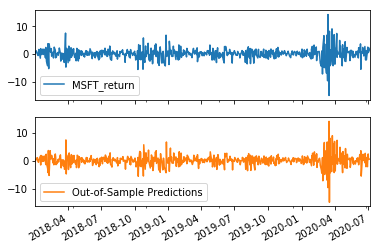

In [53]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [54]:
out_of_sample_results.head()

,MSFT_return,Out-of-Sample Predictions
2018-01-02,0.479308,-0.209986
2018-01-03,0.465387,0.479308
2018-01-04,0.880139,0.465387
2018-01-05,1.239812,0.880139
2018-01-08,0.102052,1.239812


In [55]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["MSFT_return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 3.3693771978570424


In [56]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["AAPL_return"].to_frame()
X_test = test["AAPL_lagged_return"].to_frame()
y_train = train["AAPL_return"]
y_test = test["AAPL_return"]

In [57]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [59]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea5dd4d490>,
      dtype=object)

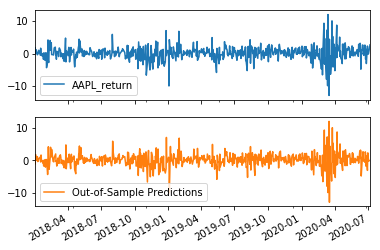

In [60]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [61]:
out_of_sample_results.head()

,AAPL_return,Out-of-Sample Predictions
2018-01-02,1.790463,-1.081365
2018-01-03,-0.017416,1.790463
2018-01-04,0.464495,-0.017416
2018-01-05,1.138531,0.464495
2018-01-08,-0.371429,1.138531


In [62]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["AAPL_return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 3.29967401770631
